In [159]:
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
style.use("seaborn-poster")
style.use("ggplot")
sns.set(style="whitegrid", color_codes=True)
mycolors=sns.light_palette("seagreen",reverse=True)

In [160]:
df_historic=pd.read_csv("https://data.cityofnewyork.us/api/views/833y-fsy8/rows.csv?accessType=DOWNLOAD")
df_ytd=pd.read_csv("https://data.cityofnewyork.us/api/views/5ucz-vwe8/rows.csv?accessType=DOWNLOAD")
df_ytd.drop("New Georeferenced Column", axis=1, inplace=True)
df_historic.drop("Lon_Lat", axis=1, inplace=True)
df=pd.concat([df_historic, df_ytd])

In [161]:
df.head()
# Print out the first 5 rows of data. 

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,201575314,08/23/2019,22:10:00,QUEENS,103,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,1037451,193561,40.697805,-73.808141
1,205748546,11/27/2019,15:54:00,BRONX,40,0.0,NaN,False,<18,M,BLACK,25-44,F,BLACK,1006789,237559,40.818700,-73.918571
2,193118596,02/02/2019,19:40:00,MANHATTAN,23,0.0,NaN,False,18-24,M,WHITE HISPANIC,18-24,M,BLACK HISPANIC,999347,227795,40.791916,-73.945480
3,204192600,10/24/2019,00:52:00,STATEN ISLAND,121,0.0,PVT HOUSE,True,25-44,M,BLACK,25-44,F,BLACK,938149,171781,40.638064,-74.166108
4,201483468,08/22/2019,18:03:00,BRONX,46,0.0,NaN,False,25-44,M,BLACK HISPANIC,18-24,M,BLACK,1008224,250621,40.854547,-73.913339


In [162]:
df.tail()
# Print out the last five rows of data. 

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
897,227221322,04/21/2021,15:57:00,BRONX,44,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,1010044,244313,40.837229,-73.906785
898,227384910,04/26/2021,22:56:00,BRONX,44,0.0,NaN,False,NaN,NaN,NaN,18-24,M,BLACK,1008187,241345,40.829088,-73.913506
899,227950669,05/09/2021,03:48:00,BRONX,48,0.0,BEAUTY/NAIL SALON,True,25-44,M,BLACK,25-44,M,BLACK,1014565,250748,40.854876,-73.890417
900,228798559,05/27/2021,22:47:00,BROOKLYN,79,0.0,NaN,False,NaN,NaN,NaN,18-24,M,BLACK,999297,188945,40.685283,-73.945747
901,229643172,06/16/2021,23:22:00,BRONX,52,0.0,NaN,True,18-24,M,WHITE HISPANIC,25-44,F,BLACK,1014313,254123,40.864141,-73.891313


In [163]:
df.shape
# Dataset contains 23865 rows and 18 columns. 

(24470, 18)

In [164]:
df.info()
# There are various types of data within this dataset, with the most prevalent data being objects 
# (strings)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 24470 entries, 0 to 901
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   INCIDENT_KEY             24470 non-null  int64  
 1   OCCUR_DATE               24470 non-null  object 
 2   OCCUR_TIME               24470 non-null  object 
 3   BORO                     24470 non-null  object 
 4   PRECINCT                 24470 non-null  int64  
 5   JURISDICTION_CODE        24468 non-null  float64
 6   LOCATION_DESC            10298 non-null  object 
 7   STATISTICAL_MURDER_FLAG  24470 non-null  bool   
 8   PERP_AGE_GROUP           15484 non-null  object 
 9   PERP_SEX                 15518 non-null  object 
 10  PERP_RACE                15518 non-null  object 
 11  VIC_AGE_GROUP            24470 non-null  object 
 12  VIC_SEX                  24470 non-null  object 
 13  VIC_RACE                 24470 non-null  object 
 14  X_COORD_CD              

In [165]:
for column in df:
    print(f"{column}: {df[column].isna().sum()/len(df)}%")

# Percentage of data that is comprised of NaN is printed out by column. Very few data points are 
# missing across the board. 

INCIDENT_KEY: 0.0%
OCCUR_DATE: 0.0%
OCCUR_TIME: 0.0%
BORO: 0.0%
PRECINCT: 0.0%
JURISDICTION_CODE: 8.173273395995096e-05%
LOCATION_DESC: 0.5791581528402125%
STATISTICAL_MURDER_FLAG: 0.0%
PERP_AGE_GROUP: 0.36722517368205965%
PERP_SEX: 0.3658357172047405%
PERP_RACE: 0.3658357172047405%
VIC_AGE_GROUP: 0.0%
VIC_SEX: 0.0%
VIC_RACE: 0.0%
X_COORD_CD: 0.0%
Y_COORD_CD: 0.0%
Latitude: 0.0%
Longitude: 0.0%


In [166]:
df["OCCUR_DATE"]=pd.to_datetime(df["OCCUR_DATE"])
# Convert all dates within the column to pandas DateTime objects.
df.sort_values(by="OCCUR_DATE", ascending=False,inplace=True)
# Sort by descending date. 

## Questions to Consider <br />


- What is the overall trend of shootings within NYC with regard to time, including more recent
trends? 
- What time of day, day of week, month of year and year has the most shootings along with most
deaths from shootings? Do holidays see more shootings on averge?
- What areas of NYC have the most shootings and most deaths from shootings?
- What might total shootings look like by the end of 2021?
- Which precinct deals with the most shootings?
- What are the demographics (age, race and sex) of victims and perpatrators of gun violence?
- In what type of locations do the most shootings occur at?

Each column in this Dataset will be explored and slong the way, these questions will be addressed.

# Shooting Incidents

In [167]:
incidents={}
for group, frame in df.groupby("OCCUR_DATE"):
    incidents[group]=len(frame["INCIDENT_KEY"].unique())
incidents=pd.Series(incidents).sort_values(ascending=False)
# As each row of data represents a victim, the shooting incident is represented by the INCIDENT_KEY. Shootings with
# multiple victims will include the same incident key but will be featured on different rows.

In [168]:
incidents.sort_index()

2006-01-01    7
2006-01-02    3
2006-01-03    4
2006-01-04    4
2006-01-05    4
             ..
2021-06-26    3
2021-06-27    7
2021-06-28    6
2021-06-29    8
2021-06-30    6
Length: 5228, dtype: int64

In [169]:
incidents=incidents.append(pd.Series(data=0,index=(pd.date_range(start="2006-01-01", end=(df["OCCUR_DATE"].iloc[0]).strftime("%Y-%m-%d")).difference(df.OCCUR_DATE))))
incidents
# In order to account for the days without any shootings, we find all the missing dates from
# the original dataframe, and append them to the value_counts series with a value of 0.

2020-07-05    30
2011-09-04    21
2020-08-15    21
2020-06-27    17
2020-07-13    16
              ..
2021-01-28     0
2021-02-05     0
2021-02-11     0
2021-02-19     0
2021-03-31     0
Length: 5660, dtype: int64

In [170]:
len((pd.date_range(start="2006-01-01", end=df["OCCUR_DATE"].iloc[0].strftime("%Y-%m-%d")).difference(df.OCCUR_DATE)))

# There were 431 days from 2006 to 2021 where there were no shootings. 

432

/Users/brandonbracho/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribution of Total Number of Shootings Per Day')

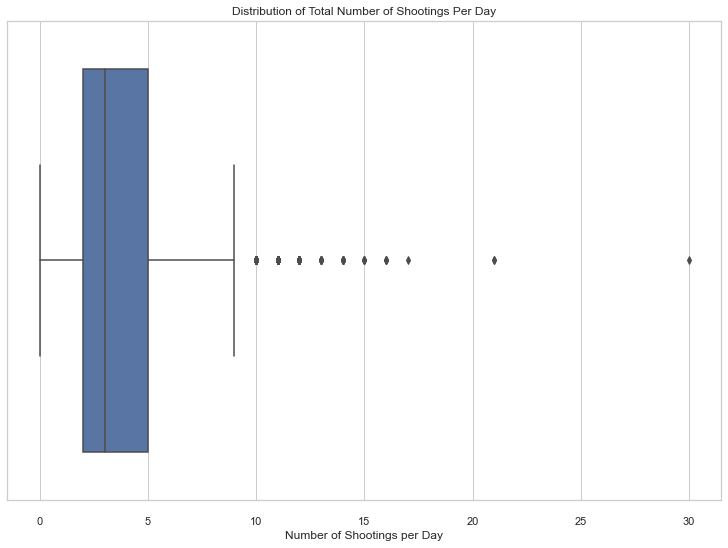

In [171]:
sns.boxplot(incidents)
plt.xlabel("Number of Shootings per Day")
plt.title("Distribution of Total Number of Shootings Per Day")

# Plots the distribution of total shootings per day.  

In [172]:
incidents.describe()


# The average number of shootings per day is around 3.4 with 3 per day being the median, suggesting the distribution
# may be positvely skewed.

count    5660.000000
mean        3.409894
std         2.560629
min         0.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        30.000000
dtype: float64

/Users/brandonbracho/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

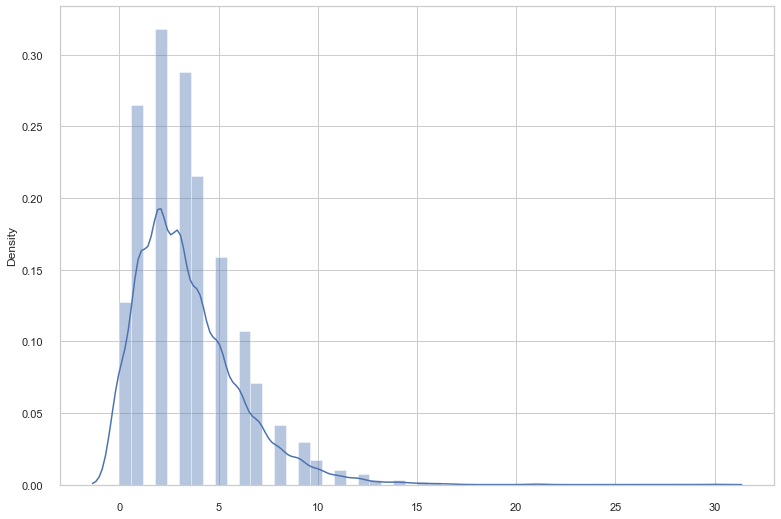

In [173]:
sns.distplot(incidents)

# From the KDE we can see that the distribution is definetely positvely skewed, with the majority of shootings per day
# lying in the range of under 5.

In [174]:
df["OCCUR_TIME"]=pd.to_datetime(df["OCCUR_TIME"])
df["YEAR"]=df["OCCUR_DATE"].dt.year
df["HOUR"]=df["OCCUR_TIME"].dt.hour
df["DAYOFWEEK"]=df["OCCUR_DATE"].dt.day_name()
df["MONTH"]=df["OCCUR_DATE"].dt.month_name()
df.head()

# Creates a column depicting the year, a column for the hour and a column for the day of week in which a shooting
# occured. 

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,...,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,YEAR,HOUR,DAYOFWEEK,MONTH
636,230245950,2021-06-30,2021-10-02 00:33:00,MANHATTAN,28,2.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,...,F,BLACK HISPANIC,998007,230362,40.798964,-73.950314,2021,0,Wednesday,June
439,230247119,2021-06-30,2021-10-02 00:52:00,MANHATTAN,32,0.0,NaN,False,NaN,NaN,...,M,BLACK,999879,236455,40.815684,-73.943538,2021,0,Wednesday,June
842,230247121,2021-06-30,2021-10-02 02:08:00,BRONX,40,0.0,NaN,False,<18,M,...,M,BLACK HISPANIC,1009464,238412,40.821034,-73.908903,2021,2,Wednesday,June
428,230276664,2021-06-30,2021-10-02 20:00:00,QUEENS,105,0.0,GROCERY/BODEGA,False,NaN,NaN,...,M,BLACK,1059372,196337,40.705266,-73.729056,2021,20,Wednesday,June
321,230247120,2021-06-30,2021-10-02 01:00:00,QUEENS,105,0.0,NaN,False,NaN,NaN,...,M,BLACK,1056526,178103,40.655242,-73.739516,2021,1,Wednesday,June


In [175]:
dayofweek={}
for name, group in df.groupby("DAYOFWEEK"):
    dayofweek[name]=len(group["INCIDENT_KEY"].unique())
    
# The code above groups the dataframe according to their respective day of week. 

Text(0.5, 1.0, 'Total Number of Shootings by Day of Week')

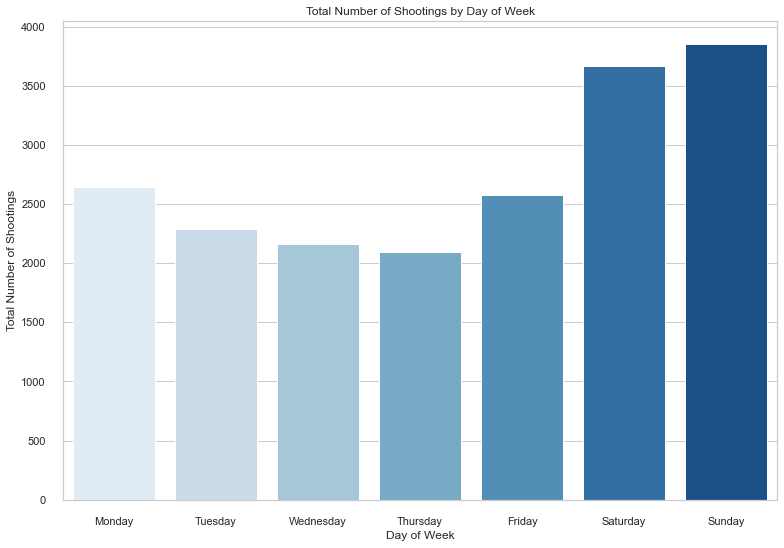

In [176]:
day=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
dayvalue=[dayofweek[dayname] for dayname in day]
sns.barplot(x=day, y=dayvalue, palette="Blues")
plt.xlabel("Day of Week")
plt.ylabel("Total Number of Shootings")
plt.title("Total Number of Shootings by Day of Week")

# The plot below shows that shootings are more prevalent during the weekend. 

In [177]:
hour={}
for name, group in df.groupby("HOUR"):
    hour[name]=len(group["INCIDENT_KEY"].unique())
hour

# Group by Hour and add respective hours to dictionary along with their counts as values.

{0: 1577,
 1: 1458,
 2: 1312,
 3: 1147,
 4: 1045,
 5: 521,
 6: 247,
 7: 166,
 8: 168,
 9: 161,
 10: 216,
 11: 275,
 12: 364,
 13: 392,
 14: 545,
 15: 636,
 16: 721,
 17: 742,
 18: 811,
 19: 1024,
 20: 1188,
 21: 1388,
 22: 1533,
 23: 1663}

Text(0.5, 1.0, 'Total Number of Shootings per Hour')

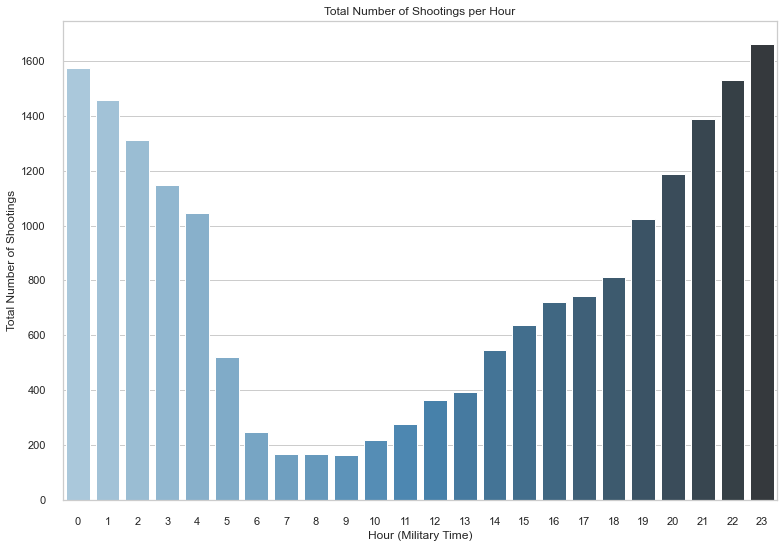

In [178]:
sns.barplot(x=list(range(24)),y=[hour[num] for num in range(24)],palette="Blues_d")
plt.xlabel("Hour (Military Time)")
plt.ylabel("Total Number of Shootings")
plt.title("Total Number of Shootings per Hour")

# The plot shows shootings are more prevalent during the late night and early morning hours of a day, as expected. 

In [179]:
year={}
for name, group in df.groupby("YEAR"):
    year[name]=len(group["INCIDENT_KEY"].unique())
year

# Group by year and add each respective year to the dictionary as a key and their counts as a value.

{2006: 1566,
 2007: 1442,
 2008: 1519,
 2009: 1420,
 2010: 1473,
 2011: 1509,
 2012: 1373,
 2013: 1103,
 2014: 1172,
 2015: 1138,
 2016: 997,
 2017: 789,
 2018: 754,
 2019: 776,
 2020: 1531,
 2021: 738}

Text(0.5, 1.0, 'Total Number of Shootings per Year')

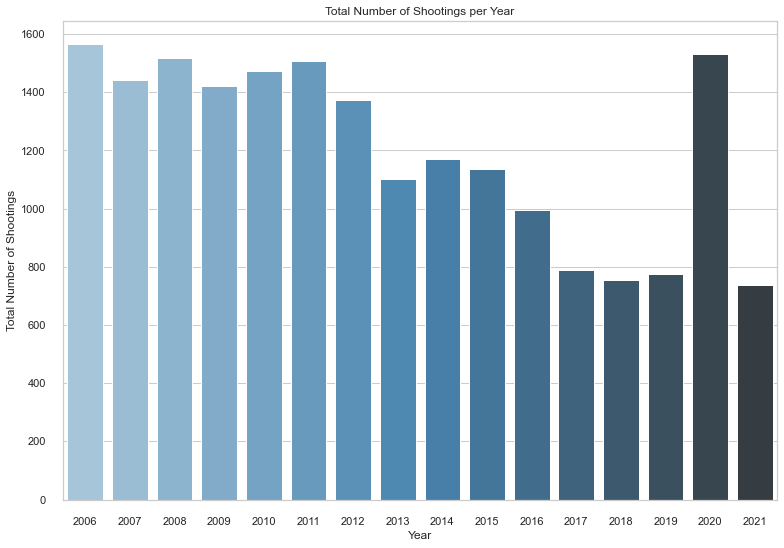

In [180]:
sns.barplot(x=list(range(2006,2022)),y=[year[num] for num in range(2006,2022)],palette="Blues_d")
plt.xlabel("Year")
plt.ylabel("Total Number of Shootings")
plt.title("Total Number of Shootings per Year")

# Shootings followed a downward trend from 2006 to 2019 and then saw a massive increase in 2020. 

In [181]:
month={}
for name, group in df.groupby("MONTH"):
    month[name]=len(group["INCIDENT_KEY"].unique())
month

# Group by Month and add each respective month to the dictionary as a key and their counts as a value.

{'April': 1478,
 'August': 2181,
 'December': 1401,
 'February': 980,
 'January': 1270,
 'July': 2166,
 'June': 2085,
 'March': 1214,
 'May': 1854,
 'November': 1333,
 'October': 1575,
 'September': 1763}

Text(0.5, 1.0, 'Total Number of Shootings per Month')

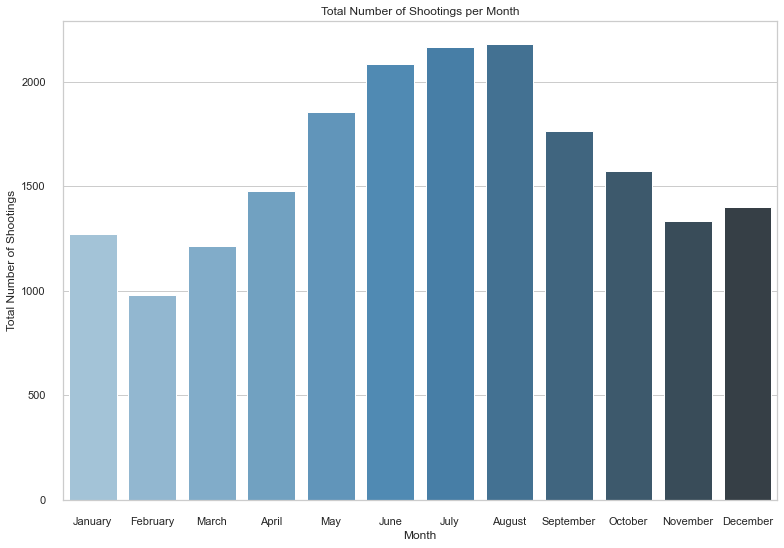

In [182]:
monthlst=["January","February","March","April","May","June","July","August","September","October","November","December"]
sns.barplot(x=monthlst,y=[month[num] for num in monthlst],palette="Blues_d")
plt.xlabel("Month")
plt.ylabel("Total Number of Shootings")
plt.title("Total Number of Shootings per Month")

# The summer months see the most shootings in the calendar year. 

In [183]:
df.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,...,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,YEAR,HOUR,DAYOFWEEK,MONTH
636,230245950,2021-06-30,2021-10-02 00:33:00,MANHATTAN,28,2.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,...,F,BLACK HISPANIC,998007,230362,40.798964,-73.950314,2021,0,Wednesday,June
439,230247119,2021-06-30,2021-10-02 00:52:00,MANHATTAN,32,0.0,NaN,False,NaN,NaN,...,M,BLACK,999879,236455,40.815684,-73.943538,2021,0,Wednesday,June
842,230247121,2021-06-30,2021-10-02 02:08:00,BRONX,40,0.0,NaN,False,<18,M,...,M,BLACK HISPANIC,1009464,238412,40.821034,-73.908903,2021,2,Wednesday,June
428,230276664,2021-06-30,2021-10-02 20:00:00,QUEENS,105,0.0,GROCERY/BODEGA,False,NaN,NaN,...,M,BLACK,1059372,196337,40.705266,-73.729056,2021,20,Wednesday,June
321,230247120,2021-06-30,2021-10-02 01:00:00,QUEENS,105,0.0,NaN,False,NaN,NaN,...,M,BLACK,1056526,178103,40.655242,-73.739516,2021,1,Wednesday,June


# Reviewing Shooting Trends Within Recent Years

In [184]:
incidents2021={}
incidents2020={}
incidents2019={}
incidents2018={}
incidents2017={}

for group, frame in df[df["YEAR"]==2021].groupby("OCCUR_DATE"):
    incidents2021[group]=len(frame["INCIDENT_KEY"].unique())
    
for group, frame in df[df["YEAR"]==2020].groupby("OCCUR_DATE"):
    incidents2020[group]=len(frame["INCIDENT_KEY"].unique())
    
for group, frame in df[df["YEAR"]==2019].groupby("OCCUR_DATE"):
    incidents2019[group]=len(frame["INCIDENT_KEY"].unique())
    
for group, frame in df[df["YEAR"]==2018].groupby("OCCUR_DATE"):
    incidents2018[group]=len(frame["INCIDENT_KEY"].unique())   

for group, frame in df[df["YEAR"]==2017].groupby("OCCUR_DATE"):
    incidents2017[group]=len(frame["INCIDENT_KEY"].unique())
    
# Adds each date present in the Dataframe as a key and their respective counts of shootings as a value. 

In [185]:
shootings2021=pd.Series(incidents2021).append(pd.Series(data=0,index=pd.date_range(start = '2021-01-01', end = (df["OCCUR_DATE"].iloc[0]).strftime("%Y-%m-%d")).difference(df[df["YEAR"]==2021].OCCUR_DATE))).sort_index()
shootings2020=pd.Series(incidents2020).append(pd.Series(data=0,index=pd.date_range(start = '2020-01-01', end = '2020-12-31' ).difference(df[df["YEAR"]==2020].OCCUR_DATE))).sort_index()
shootings2019=pd.Series(incidents2019).append(pd.Series(data=0,index=pd.date_range(start = '2019-01-01', end = '2019-12-31' ).difference(df[df["YEAR"]==2019].OCCUR_DATE))).sort_index()
shootings2018=pd.Series(incidents2018).append(pd.Series(data=0,index=pd.date_range(start = '2018-01-01', end = '2018-12-31' ).difference(df[df["YEAR"]==2018].OCCUR_DATE))).sort_index()
shootings2017=pd.Series(incidents2017).append(pd.Series(data=0,index=pd.date_range(start = '2017-01-01', end = '2017-12-31' ).difference(df[df["YEAR"]==2017].OCCUR_DATE))).sort_index()

# We create separate dataframes to show the amount of shootings per day, any missing dates from the original dataframe
# are appended with a count of zero. 

In [186]:
shootings2020[shootings2020.index <= "2020-" + str(shootings2021.index[-1].month) + "-" + str(shootings2021.index[-1].day)]
# Shows the number of shootings up to the day for which we have data for in 2021. 

2020-01-01     3
2020-01-02     6
2020-01-03     1
2020-01-04     3
2020-01-05     3
              ..
2020-06-26     9
2020-06-27    17
2020-06-28     8
2020-06-29     9
2020-06-30     8
Length: 182, dtype: int64

In [187]:
rangelist = list(map(lambda x: x.strftime('%Y-%m'),pd.date_range("2021-01","2022-01" , freq = "m")[::2]))
rangelist

['2021-01', '2021-03', '2021-05', '2021-07', '2021-09', '2021-11']

Text(0, 0.5, 'Cumaltive Sum of Shootings')

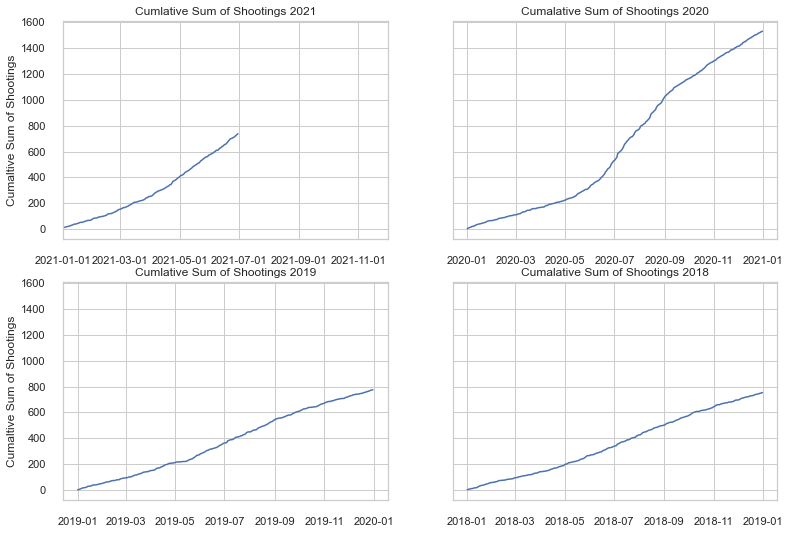

In [188]:
figure, axes= plt.subplots(nrows=2, ncols=2,sharey=True)
axes[0,0].plot(shootings2021.cumsum())
axes[0,0].set_xlim(pd.Timestamp('2021-01'), pd.Timestamp('2021-12'))
axes[0,0].set_xticks(rangelist)
axes[0,0].set_title("Cumlative Sum of Shootings 2021")
axes[0,1].plot(shootings2020.cumsum())
axes[0,1].set_title("Cumalative Sum of Shootings 2020")
axes[1,0].plot(shootings2019.cumsum())
axes[1,0].set_title("Cumlative Sum of Shootings 2019")
axes[1,1].plot(shootings2018.cumsum())
axes[1,1].set_title("Cumalative Sum of Shootings 2018")
axes[0,0].set_ylabel("Cumaltive Sum of Shootings")
axes[1,0].set_ylabel("Cumaltive Sum of Shootings")


# Plotting the cumlative sums of shootings for the last four years gives us an idea of the trend seen in shootings. 
# From 2017-2019 total shootings seem to increase linearly. However, in 2020, total shootings increased linearly 
# up to around May, and then began to see a higher powered growth onward. 2021 seems to have a more uniform increase
# in shootings, but has already seen more shootings during the same time when compared to 2020.

In [189]:
# Number of shootings incidents from the beginning of the year to June 30, which is the last day of actual data for 
# 2021.
yeartodate={}
for name, group in df.groupby("YEAR"):
    yeartodate[name] = len(group[(group["MONTH"] == "June") | (group["MONTH"] == "May") | (group["MONTH"] == "April") | (group["MONTH"] == "March") | (group["MONTH"] == "February") | (group["MONTH"] == "January")]["INCIDENT_KEY"].unique())
yeartodate

{2006: 665,
 2007: 643,
 2008: 686,
 2009: 633,
 2010: 674,
 2011: 603,
 2012: 663,
 2013: 486,
 2014: 524,
 2015: 545,
 2016: 434,
 2017: 360,
 2018: 337,
 2019: 362,
 2020: 528,
 2021: 738}

Text(0.5, 1.0, 'Number of Shootings YTD by Year (Up to June 30th)')

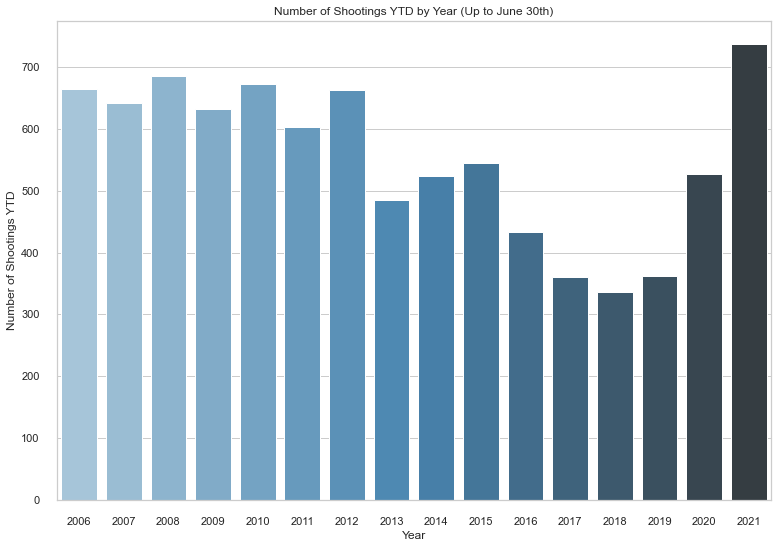

In [190]:
sns.barplot(x=list(range(2006,2022)),y=[yeartodate[num] for num in range(2006,2022)],palette="Blues_d")
plt.xlabel("Year")
plt.ylabel("Number of Shootings YTD")
plt.title("Number of Shootings YTD by Year (Up to June 30th)")
# Shootings as of June 30, across all years from 2006. 2021 has seen the most shootings in over a decade and a half.

In [191]:
shootings2021.index=shootings2021.index.strftime("%m-%d")
pctchange= pd.DataFrame(shootings2020["2020-01-01" : "2020-06-30"], columns = ["2020"])
pctchange.index=pctchange.index.strftime("%m-%d")
pctchange["2021"]=shootings2021
pctchange.loc["Total",:]= pctchange.sum()
pctchange["% Diff"]= round((( pctchange["2021"] - pctchange["2020"]) / pctchange["2021"]) *100,2)
pctchange.dropna(inplace=True)
pctchange

# Here day-by-day shootings are compared in 2020 vs 2021. The percent differnce is also compared. Overall shootings are 
# up %29 as of June, 30th.

,2020,2021,% Diff
01-01,3.0,8.0,62.50
01-02,6.0,4.0,-50.00
01-03,1.0,3.0,66.67
01-04,3.0,3.0,0.00
01-05,3.0,1.0,-200.00
...,...,...,...
06-27,17.0,7.0,-142.86
06-28,8.0,6.0,-33.33
06-29,9.0,8.0,-12.50
06-30,8.0,6.0,-33.33


In [192]:
year=[2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
pct=[]
for n in year:
    pct.append(len(df[df["YEAR"]==n]["INCIDENT_KEY"].unique()))
pct=np.reshape(pct,(1,15))
pct=pct.ravel()

pct
# Here we append the number of shootings per year to a list. 

array([1566, 1442, 1519, 1420, 1473, 1509, 1373, 1103, 1172, 1138,  997,
        789,  754,  776, 1531])

Text(0.5, 1.0, 'NYC Shootings Growth Rate (%)')

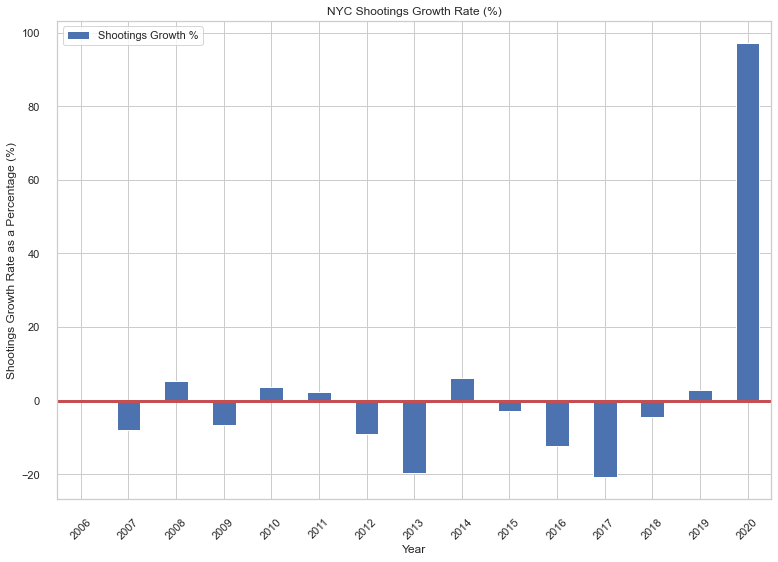

In [193]:
pctannual=pd.DataFrame(data=pct,index=year, columns=["Total Shootings"]).pct_change().fillna(0)*100
pctannual.plot(kind="bar")
plt.legend(["Shootings Growth %"])
plt.ylabel("Shootings Growth Rate as a Percentage (%)")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.axhline(linewidth=3, color='r')
plt.title("NYC Shootings Growth Rate (%)")

# Here we plot the percentage growth from the previous year for all years from 2006-2020. Shootings in 2020 saw
# nearly a %100 increase from 2019. 

# Predicting Total Number of Shootings by the End of 2021

### The model will contain several features, such as day of the week, the month, the year, wether the day falls on a holiday and it will also contain the average temperature of the day. For days in the future, we will be scraping the average historic temperature. 

In [194]:
cal=calendar()
holidaysdf=pd.DataFrame(incidents.sort_index(), columns=["Number of Shootings"])
holidaysdf["Holiday"] = holidaysdf.index.to_series().apply(lambda x: 1 if x in cal.holidays() else 0)
holidaysdf.groupby("Holiday").mean().rename(columns={"Number of Shootings":"Average Number of Daily Shootings"})

# Comparing average number of daily shootings on days that are holidays vs days that are not holidays. There appears
# to be a difference of about one shooting per day. 

,Average Number of Daily Shootings
Holiday,
0,3.381584
1,4.422078


In [195]:
shootings2021=pd.Series(incidents2021).append(pd.Series(data=0,index=pd.date_range(start = '2021-01-01', end = df["OCCUR_DATE"].iloc[0].strftime("%Y-%m-%d") ).difference(df[df["YEAR"]==2021].OCCUR_DATE))).sort_index()
shootings2021


2021-01-01    8
2021-01-02    4
2021-01-03    3
2021-01-04    3
2021-01-05    1
             ..
2021-06-26    3
2021-06-27    7
2021-06-28    6
2021-06-29    8
2021-06-30    6
Length: 181, dtype: int64

In [196]:
refdf=incidents.append(pd.Series(data=0,index=pd.date_range(start = '2006-01-01', end = df["OCCUR_DATE"].iloc[0].strftime("%Y-%m-%d") ).difference(df.OCCUR_DATE))).sort_index()
refdf

#refdf is a series that contains all the number of daily shootings from 2006 to the latest current data. 

2006-01-01    7
2006-01-02    3
2006-01-03    4
2006-01-04    4
2006-01-05    4
             ..
2021-06-26    3
2021-06-27    7
2021-06-28    6
2021-06-29    8
2021-06-30    6
Length: 6092, dtype: int64

In [197]:
refdf=pd.DataFrame(refdf,columns=["Number Of Shootings"])
refdf["Day #"]=range(1, len(refdf)+1)
refdf["Year"]=refdf.index.year
refdf["Month"]=refdf.index.month
refdf["Day of Week"]=refdf.index.dayofweek
refdf["Holiday"] = refdf.index.to_series().apply(lambda x: 1 if x in cal.holidays() else 0)
refdf

# Features are generated and added to the Series. 

,Number Of Shootings,Day #,Year,Month,Day of Week,Holiday
2006-01-01,7,1,2006,1,6,0
2006-01-02,3,2,2006,1,0,1
2006-01-03,4,3,2006,1,1,0
2006-01-04,4,4,2006,1,2,0
2006-01-05,4,5,2006,1,3,0
...,...,...,...,...,...,...
2021-06-26,3,6088,2021,6,5,0
2021-06-27,7,6089,2021,6,6,0
2021-06-28,6,6090,2021,6,0,0
2021-06-29,8,6091,2021,6,1,0


In [198]:
tempdf = pd.read_csv("tempdf.csv")
tempdf.index = pd.to_datetime(tempdf["Date"])
tempdf.drop(columns = ["Date"], inplace=True)
tempdf

# Tempdf.csv is the csv file generated from the weather web scraper. It contains historic temperature data along with
# average historic temperature data which is used for dates that have not been forecasted and are in the future. 

,Date,Temperature (F)
0,2006-01-01,37.7
1,2006-01-02,42.2
2,2006-01-03,37.9
3,2006-01-04,34.3
4,2006-01-05,42.5
...,...,...
5838,2021-12-27,37.5
5839,2021-12-28,37.0
5840,2021-12-29,36.5
5841,2021-12-30,36.5


In [201]:
tempdf.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
               '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', name='Date', length=5843, freq=None)

In [202]:
refdf.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2021-06-21', '2021-06-22', '2021-06-23', '2021-06-24',
               '2021-06-25', '2021-06-26', '2021-06-27', '2021-06-28',
               '2021-06-29', '2021-06-30'],
              dtype='datetime64[ns]', length=6092, freq=None)

In [203]:
refdf = pd.merge(refdf, tempdf, left_index = True, right_index = True)
refdf

# tempdf is then merged with refdf to order to add an extra feature. 

,Number Of Shootings,Day #,Year,Month,Day of Week,Holiday,Temperature (F)
2006-01-01,7,1,2006,1,6,0,37.7
2006-01-02,3,2,2006,1,0,1,42.2
2006-01-03,4,3,2006,1,1,0,37.9
2006-01-04,4,4,2006,1,2,0,34.3
2006-01-05,4,5,2006,1,3,0,42.5
...,...,...,...,...,...,...,...
2021-06-26,3,6088,2021,6,5,0,76.4
2021-06-27,7,6089,2021,6,6,0,81.2
2021-06-28,6,6090,2021,6,0,0,85.6
2021-06-29,8,6091,2021,6,1,0,89.7


In [204]:
X=refdf.iloc[:,1:]
y=refdf["Number Of Shootings"]
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [205]:
parameters={"learning_rate":[.001,.005,.01,.1,.3,.5,.7,.9], "n_estimators":[300,400,500,700,800,900,1000]}
reg=GradientBoostingRegressor()
regcv=GridSearchCV(reg,parameters)
regcv.fit(X_train,y_train)
regcv.best_params_

# We fit the training data to the Gradient Boosting Regressor and use GridSearchCv to obtain the best parameters for 
# our model. 

{'learning_rate': 0.01, 'n_estimators': 800}

In [206]:
regcv.score(X_test,y_test)

# While the score is not too high, the graph of the prediction later shows that it appears to generalize the trend
# seen in 2021 fairly well. 

0.3716409660914657

In [207]:
future=pd.Series(data=0,index=pd.date_range(start=refdf.index[-1].strftime("%Y-%m-%d"), end="2021-12-31"))[1:]
future=pd.DataFrame(future, columns=["Day #"])
future["Day #"]= range(refdf["Day #"][-1] + 1,len(future)+refdf["Day #"][-1]+1)
future["Year"]=future.index.year
future["Month"]=future.index.month
future["Day of Week"]=future.index.dayofweek
future["Holiday"] = future.index.to_series().apply(lambda x: 1 if x in cal.holidays() else 0)

# We create a dataframe with future dates, in order for our model to come up with a prediction. The dataframe starts
# at the following day from our last date of actual data. 

In [208]:
future = pd.merge(future, tempdf, left_index = True, right_index = True)

# The future dates are then merged with the respective average daily temperature data. 

In [209]:
pd.date_range(start=(df["OCCUR_DATE"].iloc[0] + pd.DateOffset(days=1)).strftime("%Y-%m-%d"),end="2021-12-31")

DatetimeIndex(['2021-07-01', '2021-07-02', '2021-07-03', '2021-07-04',
               '2021-07-05', '2021-07-06', '2021-07-07', '2021-07-08',
               '2021-07-09', '2021-07-10',
               ...
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
               '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', length=184, freq='D')

In [210]:
future[future.index.duplicated()]


#Makes sure there is no duplicate data that arised from the merging process. 

,Day #,Year,Month,Day of Week,Holiday,Temperature (F)


In [212]:
predictedf=shootings2021.append(pd.Series(data=regcv.predict(future), index=pd.date_range(start=(df["OCCUR_DATE"].iloc[0] + pd.DateOffset(days=1)).strftime("%Y-%m-%d"),end="2021-12-31")))

# The predicted shootings are then appended to the shootings2021 dataframe. 

Text(0.5, 1.0, 'Cumlative Sum of Shootings 2021')

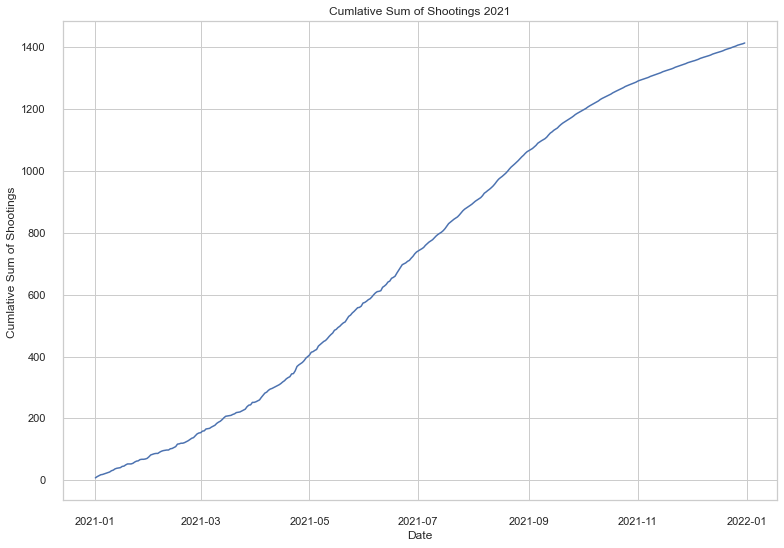

In [213]:
sns.lineplot(x=predictedf.index,y=predictedf.cumsum())
plt.ylabel("Cumlative Sum of Shootings ")
plt.xlabel("Date")
plt.title("Cumlative Sum of Shootings 2021")

# Our prediction follows the general trend seen amongst most years, shootings rise slowly in colder months, and then
# experience a sharp rise during the summer months. 

In [214]:
predictedf.cumsum()

# Our model predicts that there will be a total of approximately 1413 shootings by the end of 2021. 

2021-01-01       8.000000
2021-01-02      12.000000
2021-01-03      15.000000
2021-01-04      18.000000
2021-01-05      19.000000
                 ...     
2021-12-27    1406.496438
2021-12-28    1408.288767
2021-12-29    1409.880255
2021-12-30    1411.379609
2021-12-31    1413.781412
Length: 365, dtype: float64

# BORO

In [215]:
boro={}
for name, group in df.groupby("BORO"):
    boro[name]=len(group["INCIDENT_KEY"])
boro  

# The code above groups all instances of shootings by their respective borough and finds the length of each dataframe
# to get the total amount of instances per borough.

{'BRONX': 7020,
 'BROOKLYN': 10009,
 'MANHATTAN': 3075,
 'QUEENS': 3648,
 'STATEN ISLAND': 718}

Text(0.5, 1.0, 'Total Number of Shootings by Borough')

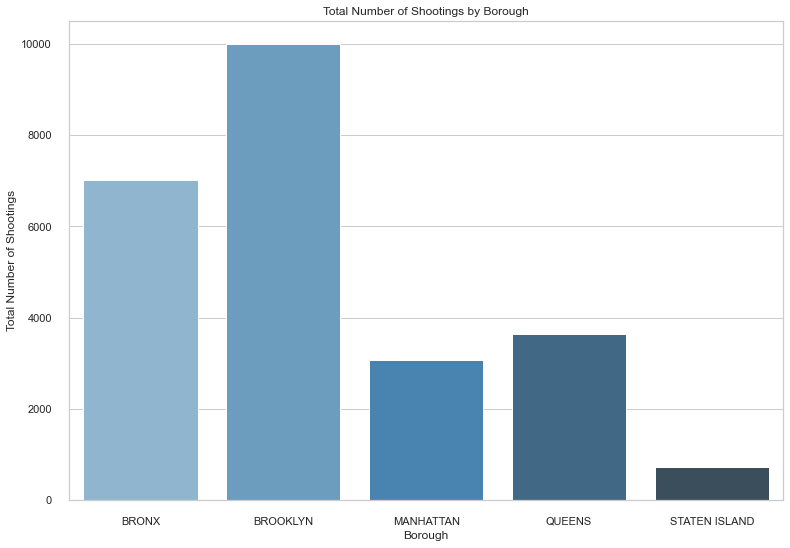

In [216]:
sns.barplot(x=list(boro.keys()),y=[boro[num] for num in list(boro.keys())],palette="Blues_d")
plt.xlabel("Borough")
plt.ylabel("Total Number of Shootings")
plt.title("Total Number of Shootings by Borough")

# Plots the total number of shootings per borough. 

In [217]:
dfpop=pd.read_csv("https://data.cityofnewyork.us/api/views/h2bk-zmw6/rows.csv?accessType=DOWNLOAD")
dfpop["Borough"] = dfpop["Borough"].apply(lambda x: x.upper())
dfpop=dfpop.set_index("Borough")
dfpop=pd.concat([dfpop,pd.Series(boro)],axis=1)
dfpop.columns=["Population","Total Shootings"]
dfpop = dfpop.replace(',','', regex=True)
dfpop["Population"] = pd.to_numeric(dfpop["Population"])
dfpop.corr()
# To get a better picture of shootings, we will first calculate the correlation between shootings and borough population.


,Population,Total Shootings
Population,1.000000,0.695251
Total Shootings,0.695251,1.000000


Text(0.5, 0, 'Borough')

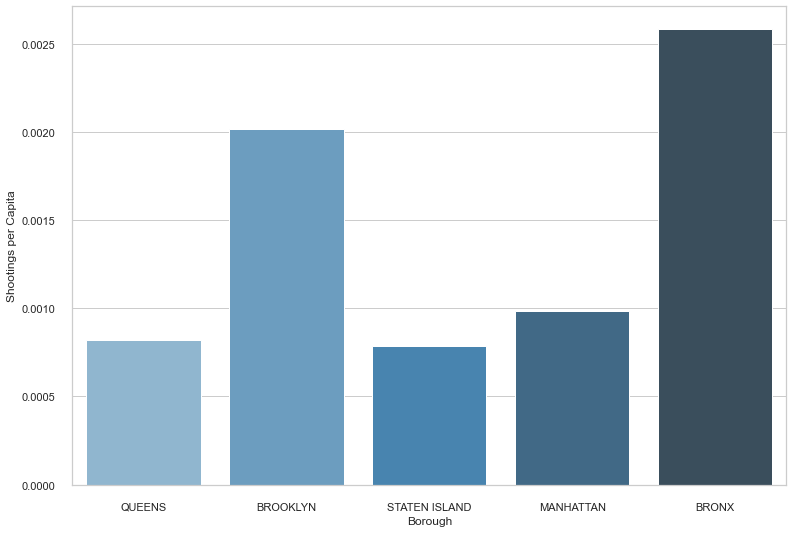

In [218]:
dfpop["Shootings per Capita"]=dfpop["Total Shootings"]/dfpop["Population"]
sns.barplot(x=dfpop.index,y=dfpop["Shootings per Capita"], palette="Blues_d")
plt.xlabel("Borough")

# Shootings per capita are plotted below and show the bronx at a significantly higher rate than the other boroughs.

# Precinct

In [219]:
len(df["PRECINCT"].unique())

# There are 77 precincts in NYC.

77

In [220]:
df["PRECINCT"].value_counts()

# The three precincts with the most shootings are in Brookyln. 

75     1405
73     1319
67     1129
79      943
44      894
       ... 
112      19
19       14
17        6
111       6
22        1
Name: PRECINCT, Length: 77, dtype: int64

In [221]:
df[df["STATISTICAL_MURDER_FLAG"]]["PRECINCT"].value_counts()

# The code above calculates the number of fatalities that resulted from shootings in each respective precinct. 
# The top three are all in Brooklyn and are also the precincts with the most shootings. 

75     266
73     246
67     216
47     182
79     174
      ... 
68       6
123      6
18       5
19       3
17       2
Name: PRECINCT, Length: 75, dtype: int64

# LOCATION_DESC

In [222]:
df

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,...,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,YEAR,HOUR,DAYOFWEEK,MONTH
636,230245950,2021-06-30,2021-10-02 00:33:00,MANHATTAN,28,2.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,...,F,BLACK HISPANIC,998007,230362,40.798964,-73.950314,2021,0,Wednesday,June
439,230247119,2021-06-30,2021-10-02 00:52:00,MANHATTAN,32,0.0,NaN,False,NaN,NaN,...,M,BLACK,999879,236455,40.815684,-73.943538,2021,0,Wednesday,June
842,230247121,2021-06-30,2021-10-02 02:08:00,BRONX,40,0.0,NaN,False,<18,M,...,M,BLACK HISPANIC,1009464,238412,40.821034,-73.908903,2021,2,Wednesday,June
428,230276664,2021-06-30,2021-10-02 20:00:00,QUEENS,105,0.0,GROCERY/BODEGA,False,NaN,NaN,...,M,BLACK,1059372,196337,40.705266,-73.729056,2021,20,Wednesday,June
321,230247120,2021-06-30,2021-10-02 01:00:00,QUEENS,105,0.0,NaN,False,NaN,NaN,...,M,BLACK,1056526,178103,40.655242,-73.739516,2021,1,Wednesday,June
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6901,9953250,2006-01-01,2021-10-02 02:34:00,QUEENS,114,0.0,BAR/NIGHT CLUB,True,18-24,M,...,M,BLACK,1002577,221583,40.774860,-73.933832,2006,2,Sunday,January
20951,9953247,2006-01-01,2021-10-02 03:30:00,BROOKLYN,67,0.0,NaN,False,UNKNOWN,U,...,M,BLACK,999316,176460,40.651014,-73.945707,2006,3,Sunday,January
5091,9953248,2006-01-01,2021-10-02 19:00:00,QUEENS,106,0.0,NONE,False,18-24,M,...,M,BLACK,1028605,187930,40.682398,-73.840079,2006,19,Sunday,January
21364,9953245,2006-01-01,2021-10-02 02:00:00,BRONX,48,0.0,NONE,False,18-24,M,...,M,BLACK,1013405,251801,40.857771,-73.894606,2006,2,Sunday,January


In [223]:
loc={}
for group, frame in df.groupby("LOCATION_DESC"):
    loc[group]=len(frame["INCIDENT_KEY"].unique())
dfloc=pd.DataFrame.from_dict(loc, orient="index", columns=["NUMBER OF SHOOTINGS"]).sort_values(by="NUMBER OF SHOOTINGS")


# The code above groups by type of locaition and then calculates the length of the unique incident keys in that frame.
# The majoirty of shootings appear to take place in Public Housing Units, as well as Apartment Buildings. 

Text(0.5, 1.0, 'Total Number of Shootings by Location')

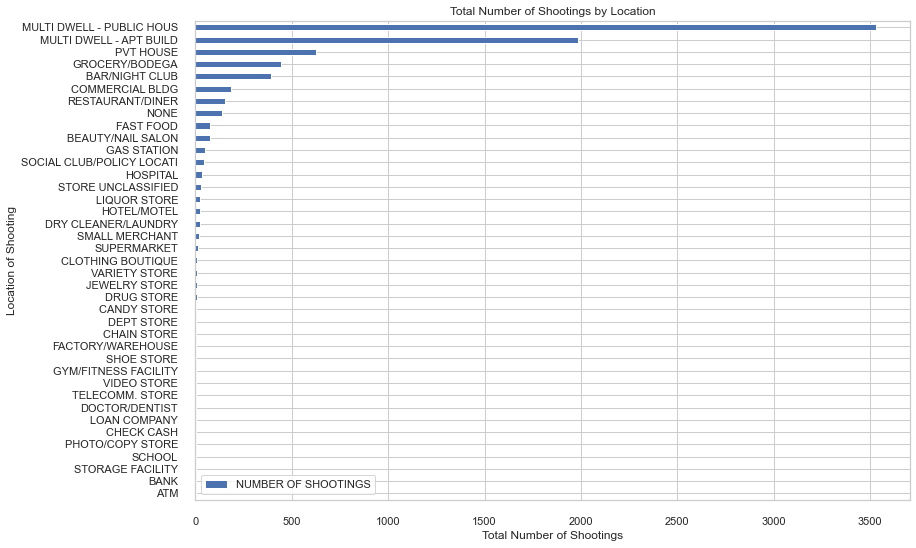

In [224]:
dfloc.plot(kind="barh")
plt.ylabel("Location of Shooting")
plt.xlabel("Total Number of Shootings")
plt.title("Total Number of Shootings by Location")

In [225]:
locdeaths=df[df["STATISTICAL_MURDER_FLAG"]]["LOCATION_DESC"].value_counts()

locdeaths

# Deaths from shootings appear to follow the same pattern in regard to location. 

MULTI DWELL - PUBLIC HOUS    815
MULTI DWELL - APT BUILD      717
PVT HOUSE                    291
BAR/NIGHT CLUB               114
GROCERY/BODEGA               102
COMMERCIAL BLDG               50
NONE                          47
RESTAURANT/DINER              28
BEAUTY/NAIL SALON             21
SOCIAL CLUB/POLICY LOCATI     16
HOTEL/MOTEL                   15
GAS STATION                   15
LIQUOR STORE                  13
FAST FOOD                     12
STORE UNCLASSIFIED             9
SMALL MERCHANT                 7
HOSPITAL                       6
SUPERMARKET                    5
SHOE STORE                     4
DEPT STORE                     4
CLOTHING BOUTIQUE              4
DRUG STORE                     3
TELECOMM. STORE                2
CANDY STORE                    2
CHAIN STORE                    2
JEWELRY STORE                  2
VARIETY STORE                  2
LOAN COMPANY                   1
SCHOOL                         1
GYM/FITNESS FACILITY           1
CHECK CASH

In [226]:
dfloc

,NUMBER OF SHOOTINGS
ATM,1
BANK,1
STORAGE FACILITY,1
SCHOOL,1
PHOTO/COPY STORE,1
CHECK CASH,1
LOAN COMPANY,1
DOCTOR/DENTIST,1
TELECOMM. STORE,2
VIDEO STORE,2


In [227]:
locationshootings=pd.Series(loc)

In [228]:
locshootingsratio=((locdeaths)/(pd.Series(loc)[locationshootings.index])).dropna()

locshootingsratio


# Calculates the number of deaths per shooting in each respective location.

BAR/NIGHT CLUB               0.288608
BEAUTY/NAIL SALON            0.280000
CANDY STORE                  0.333333
CHAIN STORE                  0.400000
CHECK CASH                   1.000000
CLOTHING BOUTIQUE            0.363636
COMMERCIAL BLDG              0.271739
DEPT STORE                   0.800000
DRUG STORE                   0.428571
DRY CLEANER/LAUNDRY          0.043478
FACTORY/WAREHOUSE            0.200000
FAST FOOD                    0.157895
GAS STATION                  0.312500
GROCERY/BODEGA               0.229213
GYM/FITNESS FACILITY         0.333333
HOSPITAL                     0.166667
HOTEL/MOTEL                  0.625000
JEWELRY STORE                0.222222
LIQUOR STORE                 0.541667
LOAN COMPANY                 1.000000
MULTI DWELL - APT BUILD      0.361027
MULTI DWELL - PUBLIC HOUS    0.231009
NONE                         0.335714
PVT HOUSE                    0.466346
RESTAURANT/DINER             0.184211
SCHOOL                       1.000000
SHOE STORE  

Text(0.5, 1.0, 'Number of Deaths per Shootings by Location')

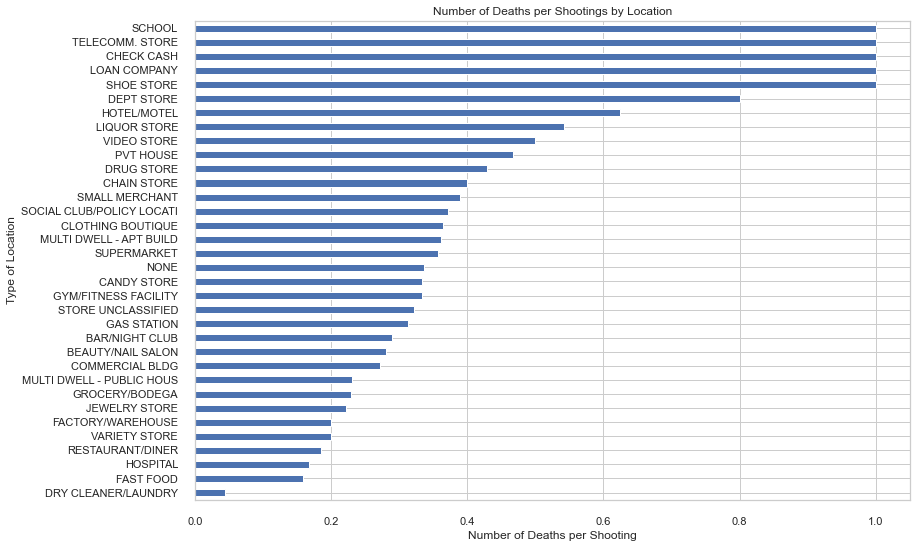

In [229]:
locshootingsratio.sort_values().plot(kind="barh")
plt.ylabel("Type of Location")
plt.xlabel("Number of Deaths per Shooting")
plt.title("Number of Deaths per Shootings by Location")

In [230]:
df.columns

Index(['INCIDENT_KEY', 'OCCUR_DATE', 'OCCUR_TIME', 'BORO', 'PRECINCT',
       'JURISDICTION_CODE', 'LOCATION_DESC', 'STATISTICAL_MURDER_FLAG',
       'PERP_AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'VIC_AGE_GROUP', 'VIC_SEX',
       'VIC_RACE', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude', 'YEAR',
       'HOUR', 'DAYOFWEEK', 'MONTH'],
      dtype='object')

# STATISTICAL_MURDER_FLAG

In [283]:
df["STATISTICAL_MURDER_FLAG"].value_counts()

# 4670 people died as a result of shootings from 2006 to June of 2021. 

False    19800
True      4670
Name: STATISTICAL_MURDER_FLAG, dtype: int64

In [295]:
str((len(df[df["STATISTICAL_MURDER_FLAG"]])/len(df)*100)) + "%"

# If you were a victim of gun violence in NYC during the years of 2006- June of 2021, your chance of dying would be
# about 19%. 

'19.08459337964855%'

In [297]:
fatalitypct = {}
for group, frame in df.groupby("YEAR"):
    fatalitypct[group] = (len(frame[frame["STATISTICAL_MURDER_FLAG"]])/len(frame))*100
fatalitypct = pd.Series(fatalitypct)
fatalitypct

# Here we add each respective year to a key in a dictionary and then add the percent chance of dying from gun violence 
# if you were a victim during that year. 

2006    21.654501
2007    19.766826
2008    18.488253
2009    19.037199
2010    21.099476
2011    19.236720
2012    16.715201
2013    16.654220
2014    16.939891
2015    19.735007
2016    18.460265
2017    17.956656
2018    21.240799
2019    18.924509
2020    18.589083
2021    20.177384
dtype: float64

Text(0.5, 1.0, 'Percent Chance of Dying from Gun Violence as a Victim by Year')

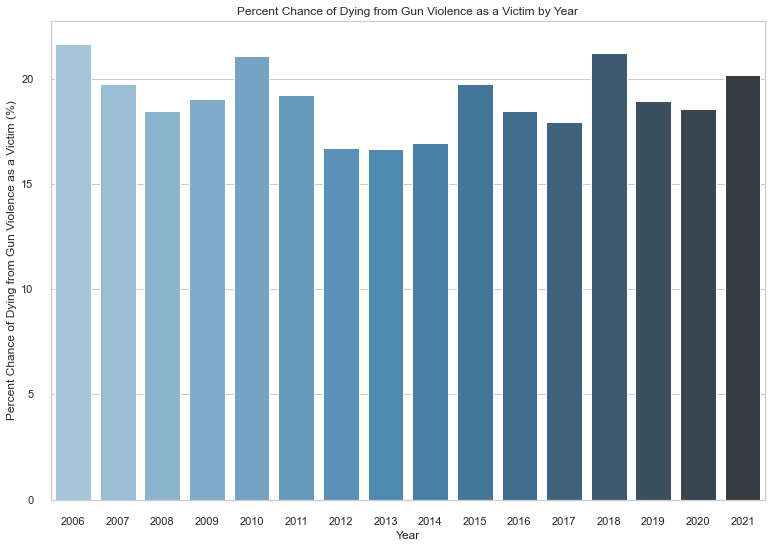

In [300]:
sns.barplot(x=fatalitypct.index, y=fatalitypct.values, palette="Blues_d")
plt.xlabel("Year")
plt.ylabel("Percent Chance of Dying from Gun Violence as a Victim (%)")
plt.title("Percent Chance of Dying from Gun Violence as a Victim by Year")

In [232]:
df[df["STATISTICAL_MURDER_FLAG"]]["OCCUR_DATE"].value_counts()

# 2020 had two of the dealiest days seen in recent history with regards to shootings in NYC. 

2020-07-26    12
2020-07-05    11
2011-12-12    10
2007-11-18     9
2010-07-11     9
              ..
2008-05-02     1
2006-01-16     1
2020-05-30     1
2016-12-26     1
2008-02-21     1
Name: OCCUR_DATE, Length: 2587, dtype: int64

In [233]:
murderyear={}
for group, frame in df.groupby("YEAR"):
    murderyear[group]=len(frame[frame["STATISTICAL_MURDER_FLAG"]])
murderyear=pd.Series(murderyear)

murderyear

# Adds each individual year as a key, and the number of murder resulting from gun violence as a value to a dictionary. 

Text(0.5, 1.0, 'Number of Murders From Shootings by Year')

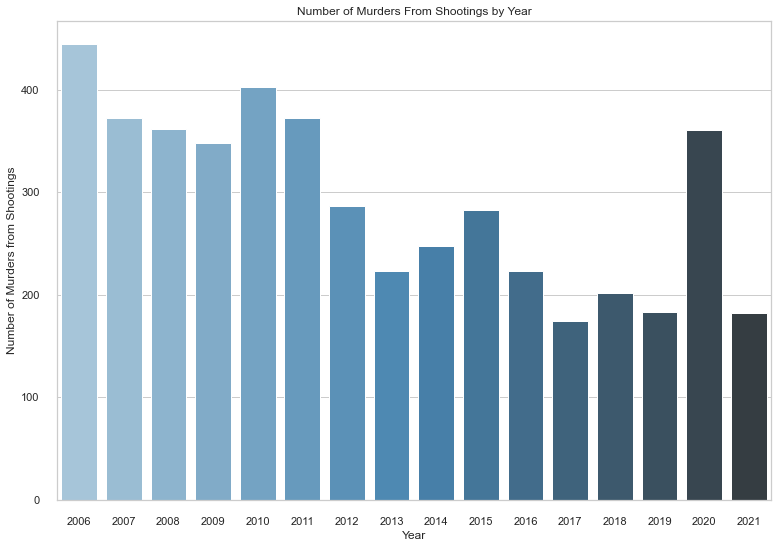

In [234]:
sns.barplot(x=murderyear.index, y=murderyear.values, palette="Blues_d")
plt.xlabel("Year")
plt.ylabel("Number of Murders from Shootings")
plt.title("Number of Murders From Shootings by Year")

# NYC has seen worse years in terms of murders from gun violence. However, in recent years, 2020 has proven to be 
# compartively deadly. 

Text(0.5, 1.0, 'NYC Murders from Shootings as a Growth Rate (%)')

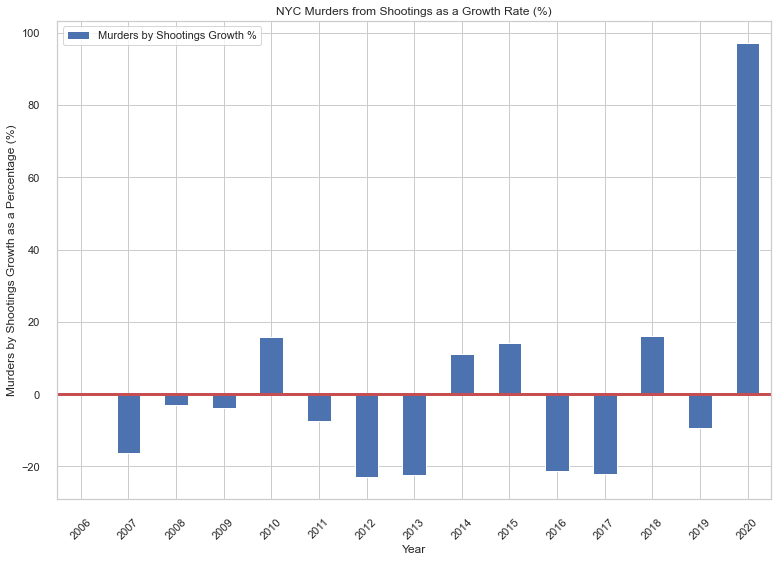

In [235]:
murderpct=(murderyear[:-1].pct_change()*100).fillna(0)
graph=murderpct.plot(kind='bar')
plt.legend(["Murders by Shootings Growth %"])
plt.ylabel("Murders by Shootings Growth as a Percentage (%)")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.axhline(linewidth=3, color='r')
plt.title("NYC Murders from Shootings as a Growth Rate (%)")

# Much like total number of shootings, NYC saw a nearly doubling of murders from gun violence in 2020 when compared to 
# 2019.

In [236]:
murdermonth={}

for group,frame in df.groupby("MONTH"):
    murdermonth[group]=len(frame[frame["STATISTICAL_MURDER_FLAG"]])

murdermonth=pd.Series(murdermonth)

murdermonth 

# Each month is added to a dictionary as a key, and the number of murders resulting from gun violence in each month
# as a value. 

In [237]:
cats=["January","February","March","April","May","June","July","August","September","October","November","December"]
murdermonth.index=pd.CategoricalIndex(murdermonth.index,categories=cats,ordered=True)

Text(0.5, 1.0, 'Number of Murders from Shootings by Month')

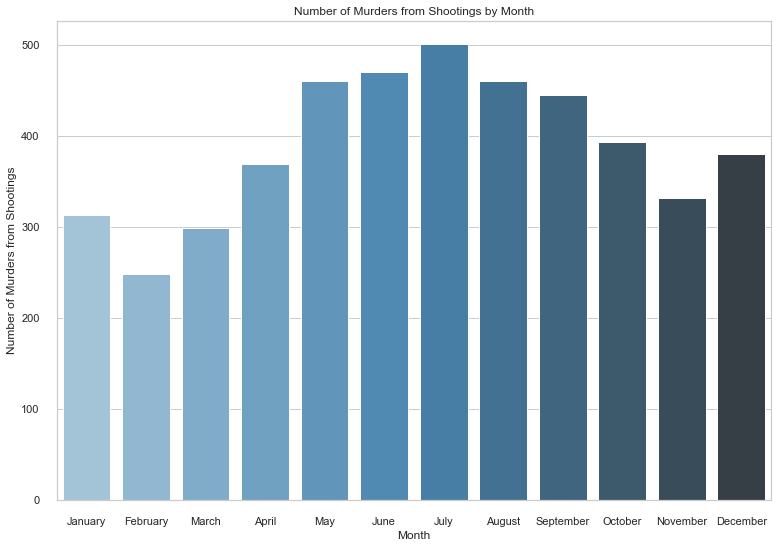

In [238]:
murdermonth=murdermonth.sort_index()
sns.barplot(x=murdermonth.index, y=murdermonth.values, palette="Blues_d")
plt.xlabel("Month")
plt.ylabel("Number of Murders from Shootings")
plt.title("Number of Murders from Shootings by Month")


# Unsurprisingly, summer months are the dealiest months for gun violence. 

In [239]:
murderday={}

for group, frame in df.groupby("DAYOFWEEK"):
    murderday[group]=len(frame[frame["STATISTICAL_MURDER_FLAG"]])

murderday=pd.Series(murderday)

In [240]:
cats2=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
murderday.index=pd.CategoricalIndex(murderday.index,categories=cats2,ordered=True)

In [241]:
murderday=murderday.sort_index()
murderday

Monday       680
Tuesday      536
Wednesday    552
Thursday     515
Friday       638
Saturday     826
Sunday       923
dtype: int64

Text(0.5, 1.0, 'Number of Murder from Shootings by Day of Week')

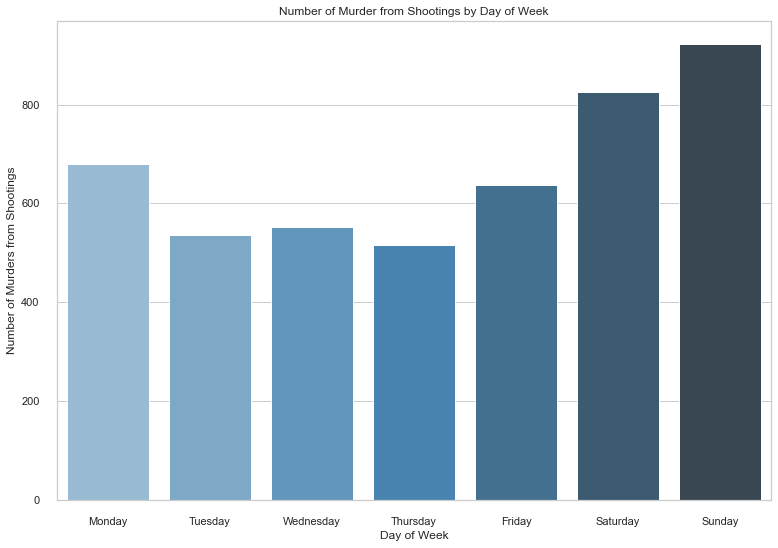

In [242]:
sns.barplot(x=murderday.index,y=murderday.values, palette="Blues_d")
plt.ylabel("Number of Murders from Shootings")
plt.xlabel("Day of Week")
plt.title("Number of Murder from Shootings by Day of Week")

In [243]:
murderhour={}
for group,frame in df.groupby("HOUR"):
    murderhour[group]=len(frame[frame["STATISTICAL_MURDER_FLAG"]])
murderhour=pd.Series(murderhour)
murderhour

0     341
1     333
2     293
3     262
4     260
5     162
6      72
7      67
8      51
9      46
10     62
11     82
12    104
13    101
14    147
15    140
16    131
17    192
18    254
19    237
20    251
21    342
22    394
23    346
dtype: int64

Text(0.5, 1.0, 'Number of Murder from Shootings by Hour')

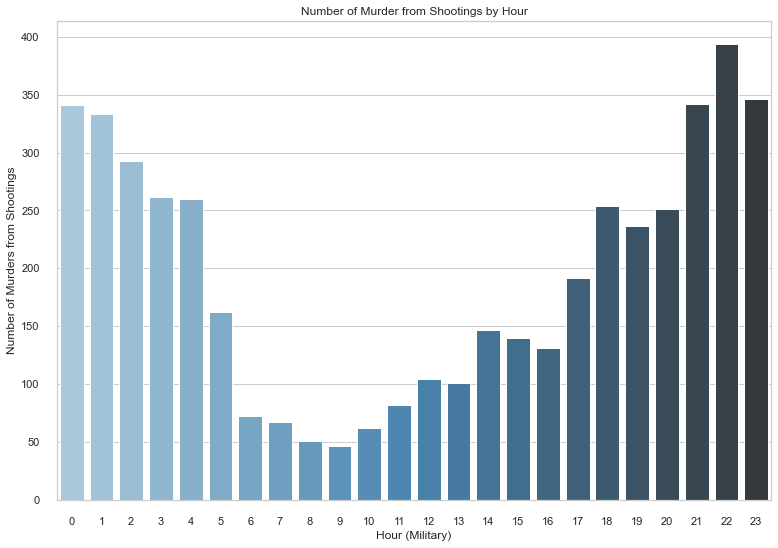

In [244]:
sns.barplot(x=murderhour.index,y=murderhour.values, palette="Blues_d")
plt.ylabel("Number of Murders from Shootings")
plt.xlabel("Hour (Military)")
plt.title("Number of Murder from Shootings by Hour")

In [245]:
murderyeartodate={}
for name, group in df[(df["MONTH"] == "June") | (df["MONTH"] == "May") | (df["MONTH"] == "April") | (df["MONTH"] == "March") | (df["MONTH"] == "February") | (df["MONTH"] == "January")].groupby("YEAR"):
    murderyeartodate[name] = len(group[group["STATISTICAL_MURDER_FLAG"]])
murderyeartodate = pd.Series(murderyeartodate)
murderyeartodate

# Here we are representing the number of murders up to June 30th for each year as of 2006. 

2006    183
2007    159
2008    170
2009    139
2010    183
2011    156
2012    138
2013    110
2014    112
2015    133
2016    100
2017     78
2018    109
2019     78
2020    129
2021    182
dtype: int64

Text(0.5, 1.0, 'Number of Murders from Shootings YTD by Year (Thru June 30th)')

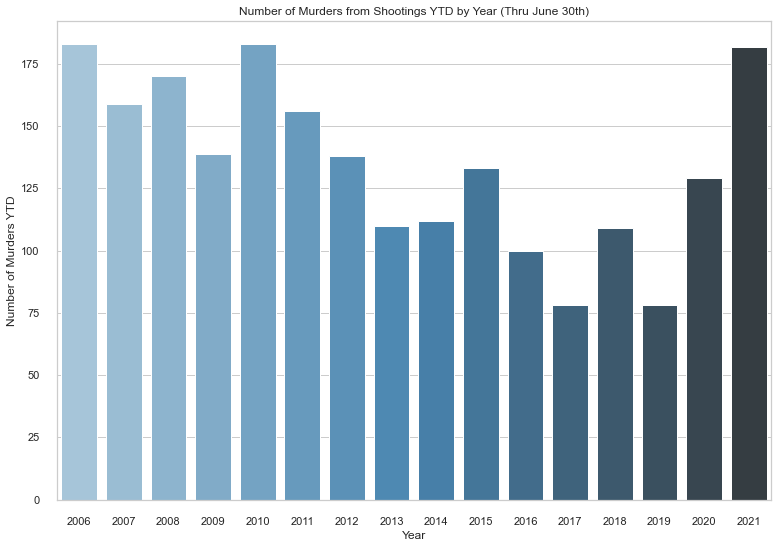

In [246]:
sns.barplot(x=murderyeartodate.index, y = murderyeartodate.values, palette= "Blues_d")
plt.ylabel("Number of Murders YTD")
plt.xlabel("Year")
plt.title("Number of Murders from Shootings YTD by Year (Thru June 30th)")

# PERP_AGE_GROUP

In [247]:
age={}
for group, frame in df.groupby("PERP_AGE_GROUP"):
    age[group]=len(frame["INCIDENT_KEY"].unique())
age=pd.Series(age)
age=age.sort_values(ascending=False)[:-3].drop("UNKNOWN")
age

18-24    4334
25-44    3753
<18      1121
45-64     381
65+        43
dtype: int64

Text(0.5, 1.0, 'Percentage of Shootings by Age Group')

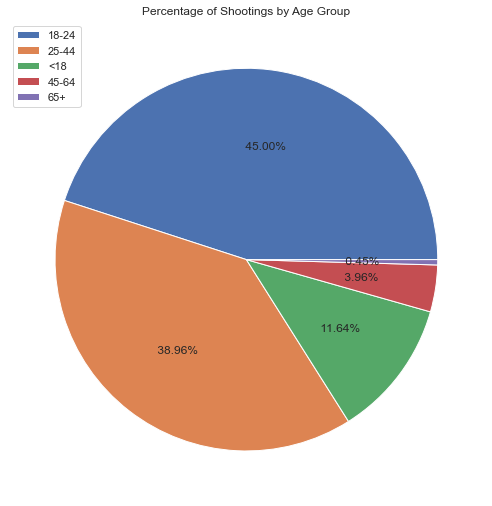

In [248]:
age.plot(kind="pie",autopct="% .2f%%", labels=None)
plt.legend(loc=2, labels=age.index)
plt.ylabel("")
plt.title("Percentage of Shootings by Age Group")

In [249]:
murderage={}
for group, frame in df.groupby("PERP_AGE_GROUP"):
    murderage[group]=len(frame[frame["STATISTICAL_MURDER_FLAG"]])
murderage=pd.Series(murderage).sort_values(ascending=False)[:-3].drop("UNKNOWN")
murderage

25-44    1274
18-24    1141
<18       251
45-64     177
65+        24
dtype: int64

Text(0.5, 1.0, 'Percentage of Murders from Shootings by Age Group')

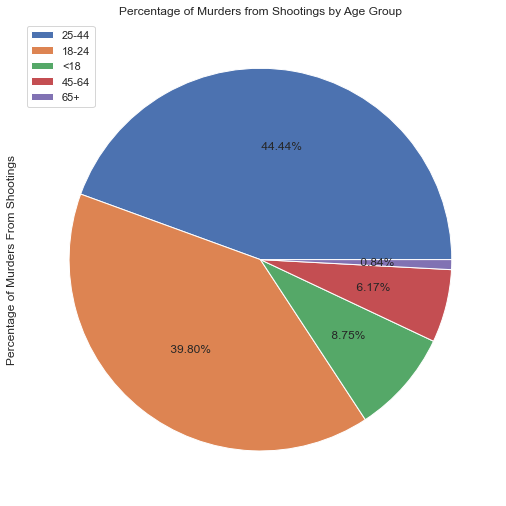

In [250]:
murderage.plot(kind="pie",autopct="% .2f%%", labels=None)
plt.legend(loc=2, labels=murderage.index)
plt.ylabel("Percentage of Murders From Shootings")
plt.title("Percentage of Murders from Shootings by Age Group")

# PERP_SEX

In [251]:
perpsex={}
for group, frame in df.groupby("PERP_SEX"):
    perpsex[group]=len(frame["INCIDENT_KEY"].unique())
perpsex=pd.Series(perpsex)
perpsex   

F      293
M    10064
U     1372
dtype: int64

Text(0.5, 1.0, 'Percentage of Shootings by Gender')

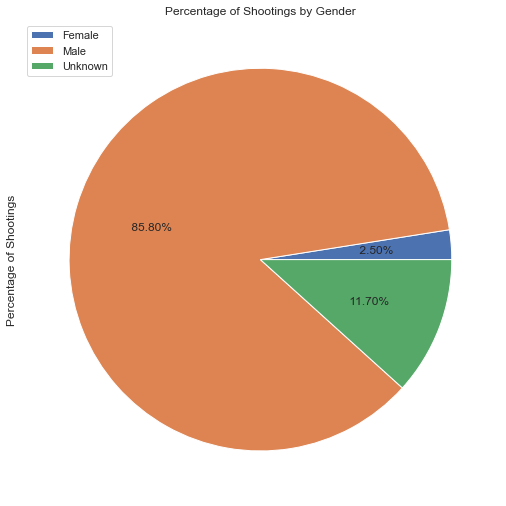

In [252]:
perpsex.plot(kind="pie",autopct="% .2f%%", labels=None)
plt.legend(loc=2, labels=["Female","Male","Unknown"])
plt.ylabel("Percentage of Shootings")
plt.title("Percentage of Shootings by Gender")

In [253]:
perpsexdeaths={}
for group, frame in df.groupby("PERP_SEX"):
    perpsexdeaths[group]=len(frame[frame["STATISTICAL_MURDER_FLAG"]])
perpsexdeaths=pd.Series(perpsexdeaths)
perpsexdeaths

F      89
M    2796
U     109
dtype: int64

Text(0, 0.5, 'Percentage of Murder From Shootings')

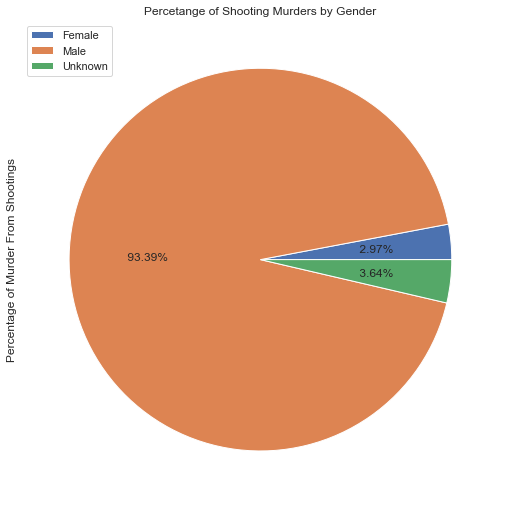

In [254]:
perpsexdeaths.plot(kind="pie",autopct="% .2f%%",labels=None)
plt.legend(loc=2, labels=["Female","Male","Unknown"])
plt.title("Percetange of Shooting Murders by Gender")
plt.ylabel("Percentage of Murder From Shootings")

# PERP_RACE

In [255]:
perprace={}
for group, frame in df.groupby("PERP_RACE"):
    perprace[group]=len(frame["INCIDENT_KEY"].unique())
perprace=pd.Series(perprace)
perprace

AMERICAN INDIAN/ALASKAN NATIVE       2
ASIAN / PACIFIC ISLANDER            90
BLACK                             7689
BLACK HISPANIC                     890
UNKNOWN                           1698
WHITE                              218
WHITE HISPANIC                    1511
dtype: int64

Text(0, 0.5, 'Percentage of Shootings')

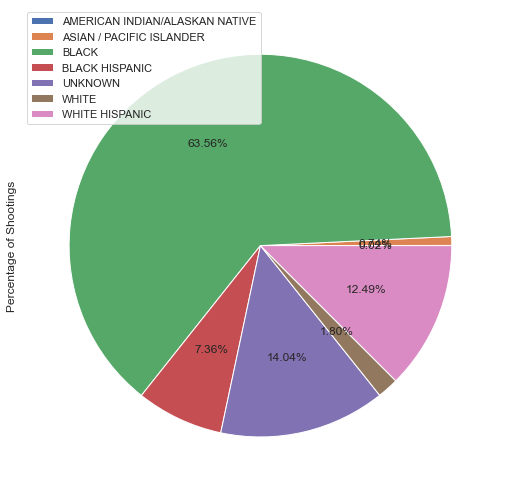

In [256]:
perprace.plot(kind="pie",autopct='%.2f%%', labels=None)
plt.legend(loc=2, labels=perprace.index)
plt.ylabel("Percentage of Shootings")



In [257]:
racemurder={}
for group, frame in df.groupby("PERP_RACE"):
    racemurder[group]=len(frame[frame["STATISTICAL_MURDER_FLAG"]])
racemurder=pd.Series(racemurder)

Text(0, 0.5, 'Percentage of Murders by Shootings')

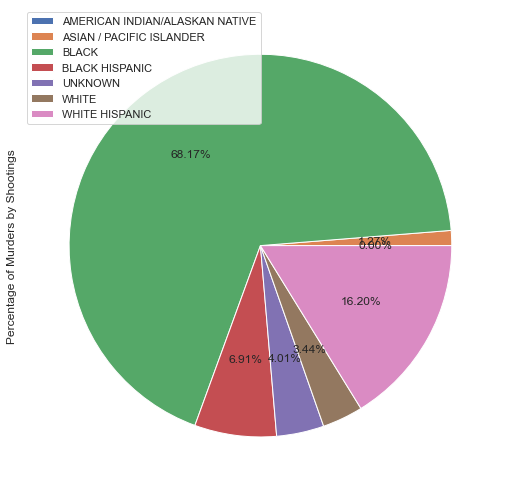

In [258]:
racemurder.plot(kind="pie", autopct='%.2f%%', labels=None)
plt.legend(loc=2,labels=racemurder.index)
plt.ylabel("Percentage of Murders by Shootings")

# VIC_AGE_GROUP

In [259]:
vicage={}
for group, frame in df.groupby("VIC_AGE_GROUP"):
    vicage[group]=len(frame)
vicage=pd.Series(vicage)
vicage

18-24       9265
25-44      10787
45-64       1592
65+          161
<18         2596
UNKNOWN       69
dtype: int64

Text(0, 0.5, 'Percentage of Shootings')

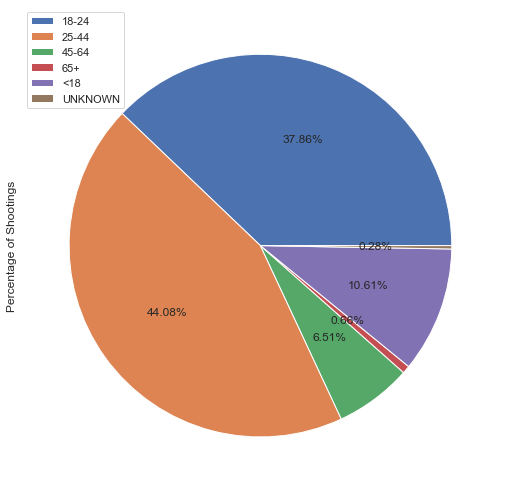

In [260]:
vicage.plot(kind='pie', autopct="%.2f%%", labels=None)
plt.legend(loc=2, labels=vicage.index)
plt.ylabel("Percentage of Shootings")

# While the majority of perpatrators are between the ages of 18-24, the majority of the victims appear to be between
# the ages of 25-44.

In [261]:
vicmurderage={}
for group, frame in df.groupby("VIC_AGE_GROUP"):
    vicmurderage[group]=len(frame[frame["STATISTICAL_MURDER_FLAG"]])
vicmurderage=pd.Series(vicmurderage)
vicmurderage

18-24      1510
25-44      2357
45-64       403
65+          54
<18         330
UNKNOWN      16
dtype: int64

Text(0, 0.5, 'Percentage of Murders From Shootings')

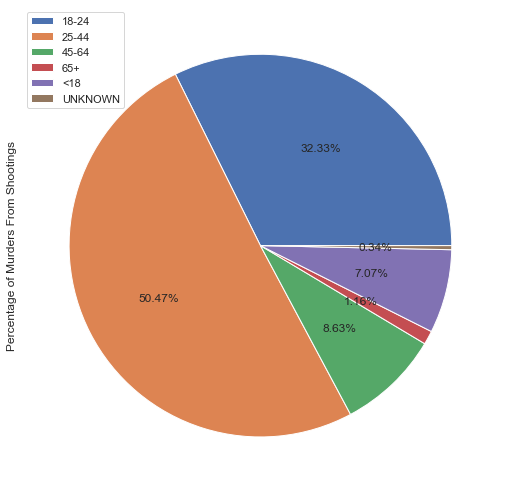

In [262]:
vicmurderage.plot(kind='pie', autopct='%.2f%%', labels=None)
plt.legend(loc=2, labels=vicmurderage.index)
plt.ylabel("Percentage of Murders From Shootings")

In [263]:
df.iloc[:, 7:]

,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,YEAR,HOUR,DAYOFWEEK,MONTH
636,False,NaN,NaN,NaN,25-44,F,BLACK HISPANIC,998007,230362,40.798964,-73.950314,2021,0,Wednesday,June
439,False,NaN,NaN,NaN,25-44,M,BLACK,999879,236455,40.815684,-73.943538,2021,0,Wednesday,June
842,False,<18,M,BLACK,18-24,M,BLACK HISPANIC,1009464,238412,40.821034,-73.908903,2021,2,Wednesday,June
428,False,NaN,NaN,NaN,25-44,M,BLACK,1059372,196337,40.705266,-73.729056,2021,20,Wednesday,June
321,False,NaN,NaN,NaN,25-44,M,BLACK,1056526,178103,40.655242,-73.739516,2021,1,Wednesday,June
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6901,True,18-24,M,BLACK,25-44,M,BLACK,1002577,221583,40.774860,-73.933832,2006,2,Sunday,January
20951,False,UNKNOWN,U,UNKNOWN,18-24,M,BLACK,999316,176460,40.651014,-73.945707,2006,3,Sunday,January
5091,False,18-24,M,BLACK,18-24,M,BLACK,1028605,187930,40.682398,-73.840079,2006,19,Sunday,January
21364,False,18-24,M,BLACK,<18,M,BLACK,1013405,251801,40.857771,-73.894606,2006,2,Sunday,January


In [264]:
print(df.loc[:,["PERP_AGE_GROUP","VIC_AGE_GROUP"]])

      PERP_AGE_GROUP VIC_AGE_GROUP
636              NaN         25-44
439              NaN         25-44
842              <18         18-24
428              NaN         25-44
321              NaN         25-44
...              ...           ...
6901           18-24         25-44
20951        UNKNOWN         18-24
5091           18-24         18-24
21364          18-24           <18
11775            NaN         25-44

[24470 rows x 2 columns]


In [265]:
pd.crosstab(df["PERP_AGE_GROUP"], df["VIC_AGE_GROUP"],normalize='index').drop(["1020","940","224","UNKNOWN"],axis=0).drop(["UNKNOWN"],axis=1)

# 18-24 year olds tend to target their own age group the most. The same trend follows for 25-44 year olds. 45-64 year
# olds, however, tend to target 25-44 the most and 65+ year olds also tend to target 25-44 the greatest. <18 year olds
# tend to target 18-24 year olds the greatest. 

VIC_AGE_GROUP,18-24,25-44,45-64,65+,<18
PERP_AGE_GROUP,,,,,
18-24,0.447052,0.364092,0.051245,0.006450,0.128651
25-44,0.276330,0.575391,0.083212,0.008342,0.049635
45-64,0.118236,0.527054,0.280561,0.020040,0.038076
65+,0.017857,0.410714,0.392857,0.178571,0.000000
<18,0.400287,0.242468,0.046628,0.006456,0.302726


# VIC_SEX

In [266]:
vicsex={}
for group, frame in df.groupby("VIC_SEX"):
    vicsex[group]= len(frame)
vicsex=pd.Series(vicsex)
vicsex

F     2288
M    22154
U       28
dtype: int64

Text(0, 0.5, 'Percentage of Shoootings')

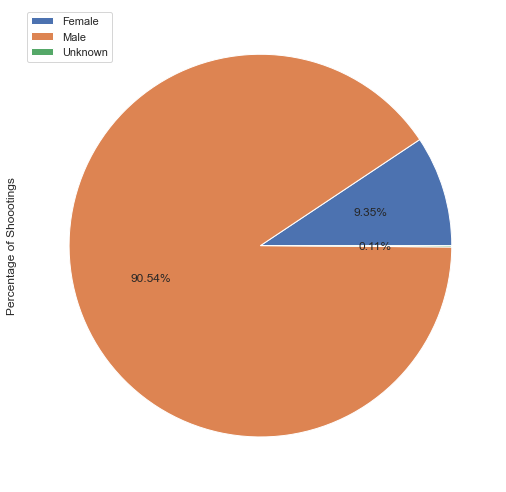

In [267]:
vicsex.plot(kind="pie", autopct="%.2f%%", labels=None)
plt.legend(loc=2, labels=["Female","Male","Unknown"])
plt.ylabel("Percentage of Shoootings")

In [268]:
vicmurdersex={}
for group, frame in df.groupby("VIC_SEX"):
    vicmurdersex[group] = len(frame[frame["STATISTICAL_MURDER_FLAG"]])
vicmurdersex = pd.Series(vicmurdersex)
vicmurdersex

F     461
M    4208
U       1
dtype: int64

Text(0, 0.5, 'Percentage of Murders From Shootings')

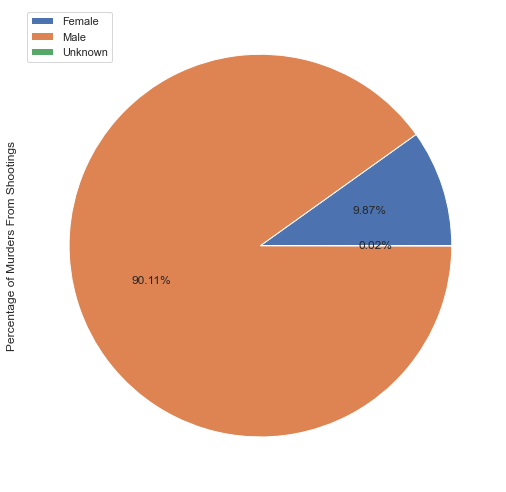

In [269]:
vicmurdersex.plot(kind='pie', autopct="%.2f%%", labels=None)
plt.legend(loc=2, labels = ["Female", "Male", "Unknown"])
plt.ylabel("Percentage of Murders From Shootings")

In [270]:
df.reset_index(inplace=True)

In [271]:
pd.crosstab(df["PERP_SEX"], df["VIC_SEX"])

# Shooting distribution (Male on male, male on female, female on female, etc)

VIC_SEX,F,M,U
PERP_SEX,,,
F,52,291,2
M,1467,12190,12
U,113,1390,1


In [272]:
pd.crosstab((df[df["STATISTICAL_MURDER_FLAG"]])["PERP_SEX"], (df[df["STATISTICAL_MURDER_FLAG"]])["VIC_SEX"])

# Murder distribtion (Female on Female, Female on male, male on female, etc)

VIC_SEX,F,M,U
PERP_SEX,,,
F,11,78,0
M,354,2441,1
U,4,105,0


# VIC_RACE

In [273]:
vicrace={}
for group, frame in df.groupby("VIC_RACE"):
    vicrace[group]=len(frame)
vicrace=pd.Series(vicrace)
vicrace

AMERICAN INDIAN/ALASKAN NATIVE        9
ASIAN / PACIFIC ISLANDER            327
BLACK                             17463
BLACK HISPANIC                     2348
UNKNOWN                             127
WHITE                               634
WHITE HISPANIC                     3562
dtype: int64

Text(0, 0.5, 'Percetange of Shootings Victims by Race')

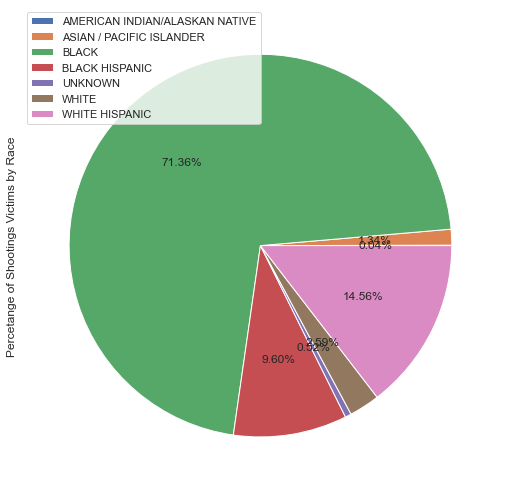

In [274]:
vicrace.plot(kind="pie",autopct="%.2f%%", labels=None)
plt.legend(loc=2, labels=vicrace.index)
plt.ylabel("Percetange of Shootings Victims by Race")

In [275]:
vicracemurder={}
for group, frame in df.groupby("VIC_RACE"):
    vicracemurder[group] = len(frame[frame["STATISTICAL_MURDER_FLAG"]])
vicracemurder = pd.Series(vicracemurder)
vicracemurder

AMERICAN INDIAN/ALASKAN NATIVE       0
ASIAN / PACIFIC ISLANDER            82
BLACK                             3280
BLACK HISPANIC                     363
UNKNOWN                             17
WHITE                              182
WHITE HISPANIC                     746
dtype: int64

Text(0, 0.5, 'Percentage of Murder Victims From Shootings by Race')

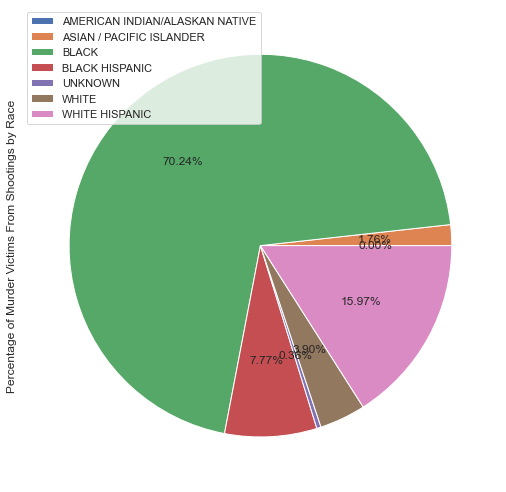

In [276]:
vicracemurder.plot(kind="pie", autopct= "%.2f%%" , labels= None)
plt.legend(loc=2, labels = vicracemurder.index)
plt.ylabel("Percentage of Murder Victims From Shootings by Race")

In [278]:
df

,index,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,...,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,YEAR,HOUR,DAYOFWEEK,MONTH
0,636,230245950,2021-06-30,2021-10-02 00:33:00,MANHATTAN,28,2.0,MULTI DWELL - PUBLIC HOUS,False,NaN,...,F,BLACK HISPANIC,998007,230362,40.798964,-73.950314,2021,0,Wednesday,June
1,439,230247119,2021-06-30,2021-10-02 00:52:00,MANHATTAN,32,0.0,NaN,False,NaN,...,M,BLACK,999879,236455,40.815684,-73.943538,2021,0,Wednesday,June
2,842,230247121,2021-06-30,2021-10-02 02:08:00,BRONX,40,0.0,NaN,False,<18,...,M,BLACK HISPANIC,1009464,238412,40.821034,-73.908903,2021,2,Wednesday,June
3,428,230276664,2021-06-30,2021-10-02 20:00:00,QUEENS,105,0.0,GROCERY/BODEGA,False,NaN,...,M,BLACK,1059372,196337,40.705266,-73.729056,2021,20,Wednesday,June
4,321,230247120,2021-06-30,2021-10-02 01:00:00,QUEENS,105,0.0,NaN,False,NaN,...,M,BLACK,1056526,178103,40.655242,-73.739516,2021,1,Wednesday,June
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24465,6901,9953250,2006-01-01,2021-10-02 02:34:00,QUEENS,114,0.0,BAR/NIGHT CLUB,True,18-24,...,M,BLACK,1002577,221583,40.774860,-73.933832,2006,2,Sunday,January
24466,20951,9953247,2006-01-01,2021-10-02 03:30:00,BROOKLYN,67,0.0,NaN,False,UNKNOWN,...,M,BLACK,999316,176460,40.651014,-73.945707,2006,3,Sunday,January
24467,5091,9953248,2006-01-01,2021-10-02 19:00:00,QUEENS,106,0.0,NONE,False,18-24,...,M,BLACK,1028605,187930,40.682398,-73.840079,2006,19,Sunday,January
24468,21364,9953245,2006-01-01,2021-10-02 02:00:00,BRONX,48,0.0,NONE,False,18-24,...,M,BLACK,1013405,251801,40.857771,-73.894606,2006,2,Sunday,January


In [279]:
pd.crosstab(df["PERP_RACE"], df["VIC_RACE"])

VIC_RACE,AMERICAN INDIAN/ALASKAN NATIVE,ASIAN / PACIFIC ISLANDER,BLACK,BLACK HISPANIC,UNKNOWN,WHITE,WHITE HISPANIC
PERP_RACE,,,,,,,
AMERICAN INDIAN/ALASKAN NATIVE,0,0,2,0,0,0,0
ASIAN / PACIFIC ISLANDER,0,38,41,12,2,11,21
BLACK,4,126,8014,698,39,170,1055
BLACK HISPANIC,0,17,450,287,7,32,318
UNKNOWN,3,14,1384,161,13,42,262
WHITE,0,11,32,19,2,152,47
WHITE HISPANIC,0,31,653,362,15,85,886


In [301]:
df.columns

Index(['index', 'INCIDENT_KEY', 'OCCUR_DATE', 'OCCUR_TIME', 'BORO', 'PRECINCT',
       'JURISDICTION_CODE', 'LOCATION_DESC', 'STATISTICAL_MURDER_FLAG',
       'PERP_AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'VIC_AGE_GROUP', 'VIC_SEX',
       'VIC_RACE', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude', 'YEAR',
       'HOUR', 'DAYOFWEEK', 'MONTH'],
      dtype='object')